## Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [ ]:
url = 'data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 6831.502390481903
Iteration = 1, Loss = 830.2219755058572
Iteration = 1, Loss = 107.00236819201326
Iteration = 1, Loss = 19.84652756529404
Iteration = 2, Loss = 9.343292893462705
Iteration = 3, Loss = 8.077531424505887
Iteration = 4, Loss = 7.924986005558112
Iteration = 5, Loss = 7.90659523613704
Iteration = 6, Loss = 7.904371562688062
Iteration = 7, Loss = 7.904096200988862
Iteration = 8, Loss = 7.904055632802323
Iteration = 9, Loss = 7.904043360533149
Iteration = 10, Loss = 7.904034498973798
Iteration = 11, Loss = 7.904026049185857
Iteration = 12, Loss = 7.904017649764544
Iteration = 13, Loss = 7.904009257156573
Iteration = 14, Loss = 7.904000866113225
Iteration = 15, Loss = 7.903992476001891
Iteration = 16, Loss = 7.903984086746267
Iteration = 17, Loss = 7.903975698337083
Iteration = 18, Loss = 7.903967310773143
Iteration = 19, Loss = 7.903958924054228
Iteration = 20, Loss = 7.903950538180239


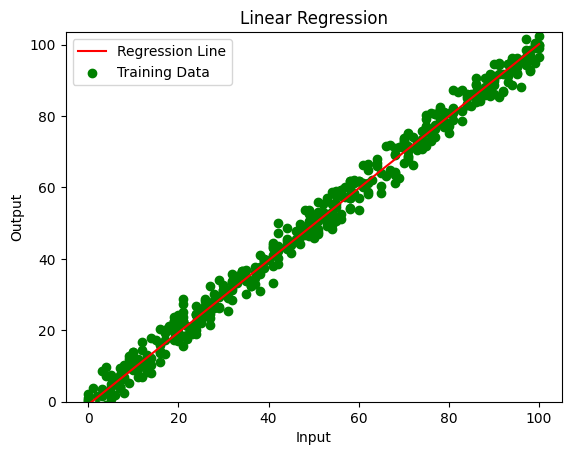

In [ ]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

# Multiple Linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [ ]:
X = X[['MedInc', 'AveRooms']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


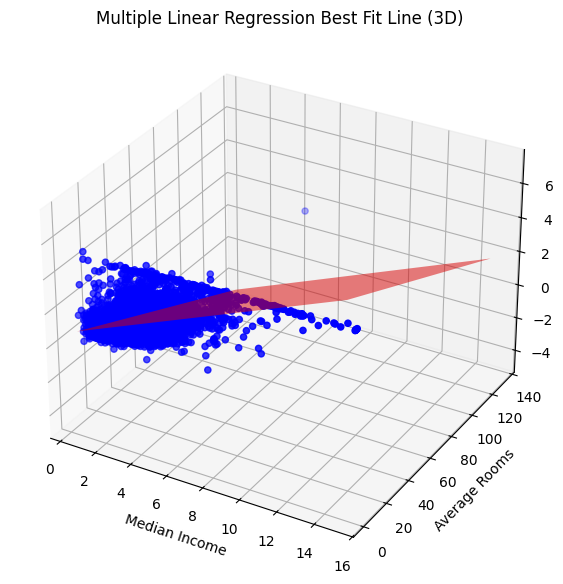

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

## Polynomial regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Sample data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = x**2 + 2*x + 1   # True relationship: y = x^2 + 2x + 1


In [ ]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


In [ ]:
model = LinearRegression()
model.fit(x_poly, y)


LinearRegression()

In [ ]:
y_pred = model.predict(x_poly)

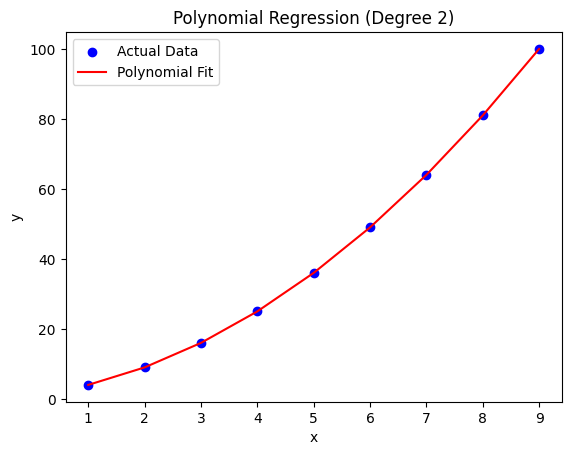

In [ ]:
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

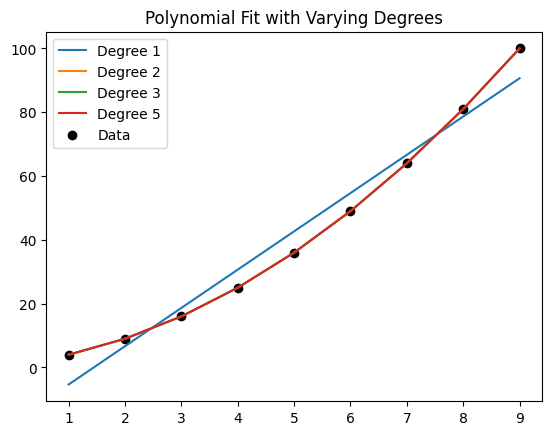

In [ ]:
for degree in [1, 2, 3, 5]:
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression().fit(x_poly, y)
    y_pred = model.predict(x_poly)

    plt.plot(x, y_pred, label=f'Degree {degree}')

plt.scatter(x, y, color='black', label='Data')
plt.legend()
plt.title("Polynomial Fit with Varying Degrees")
plt.show()
